In [1]:
# pip install findspark
import findspark
findspark.init()

In [2]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder \
        .appName("SVD") \
        .config("spark.driver.memory", "4g") \
        .getOrCreate()

In [3]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(spark)

spark.sparkContext._conf.getAll()  # check the config

C:\Users\Bans\Desktop\DIABD\spark-3.5.4-bin-hadoop3\python\pyspark\sql\context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


[('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/jdk.internal.ref=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'),
 ('spark.driver.memory', '4g'),
 ('spark.executor.id', 'driver'),
 ('spark.driver.host', 'DESKTOP-DJUJ7

In [6]:
user_movie_matrix = spark.read.csv('hdfs://localhost:9000/test/user_movie_matrix.csv', header=True, inferSchema=True)
#parallelize the data

In [8]:
pip install scipy

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 217.9 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.8 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 404.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.8 MB 1.3 MB/s eta 0:00:35
   ---------------------------------------- 0.0/44.8 MB 960.0 kB/s eta 0:00:47
   ---------------------------------------- 0.0/44.8 MB 960.0 kB/s eta 0:00:47
   ---------------------------------------- 0.0/44.8 MB 960.0 kB/s eta 0:00:47
   ---------------------------------------- 0.0/44.8 MB 960.0 kB/s eta 0:00:47
   ---------------------------------------- 0.1/44.8 MB 217.9 kB/s eta 0:03:26
   ---------------------------------------- 0.1/44.8 MB 290.5 kB/s eta 0:


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip install pandas

  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB 1.3 MB/s eta 0:00:10
   ---------------------------------------- 0.1/11.6 MB 1.1 MB/s eta 0:00:11
   ---------------------------------------- 0.1/11.6 MB 1.0 MB/s eta 0:00:12
   ---------------------------------------- 0.1/11.6 MB 1.0 MB/s eta 0:00:12
   ---------------------------------------- 0.1/11.6 MB 1.0 MB/s eta 0:00:12
   ---------------------------------------- 0.1/11.6 MB 1.0 MB/s eta 0:00:12
   ---------------------------------------- 0.1/11.6 MB 1.0 MB/s eta 0:00:12
   ---------------------------------------- 0.1/11.6 MB 1.0 MB/s eta 0:00:12
   ---------------------------------------- 0.1/11.6 MB 1.0 MB/s eta 0:00:12
   ---------------------------------------- 0.1/11.6 MB 233.8 kB/s eta 0:00:50
    ---------------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from scipy.sparse import csr_matrix

sparse_user_movie_matrix = csr_matrix(user_movie_matrix.toPandas().values)

In [12]:
from scipy.sparse.linalg import svds

U, sigma, Vt = svds(sparse_user_movie_matrix, k=20)  # k: numero di feature latenti

In [13]:
import numpy as np
from scipy.linalg import sqrtm

sigma = np.diag(sigma)

root_sigma = sqrtm(sigma)

U = np.dot(U, root_sigma)

In [14]:
pip install matplotlib

     ---------------------------------------- 0.0/168.5 kB ? eta -:--:--
     -------- ---------------------------- 41.0/168.5 kB 991.0 kB/s eta 0:00:01
     -------- ---------------------------- 41.0/168.5 kB 991.0 kB/s eta 0:00:01
     ------------- ----------------------- 61.4/168.5 kB 409.6 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/168.5 kB 595.3 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/168.5 kB 595.3 kB/s eta 0:00:01
     ------------------------------------ 168.5/168.5 kB 597.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB 435.7 kB/s eta 0:00:19
   ---------------------------------------- 0.1/8.0 MB 491.5 kB/s eta 0:00:17
   ---------------------------------------- 0.1/8.0 MB 581.0 kB/s eta 0:00:14
    --

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


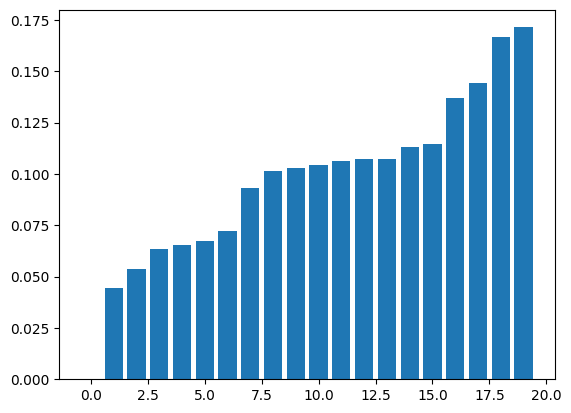

In [15]:
utente = 2

import matplotlib.pyplot as plt

U = np.sort(U)
U_scaled = U[utente] - U[utente].min()
# U_scaled /= U_scaled.max()
plt.bar(range(20), U_scaled)
plt.show()

In [16]:
approx_user_movie_matrix = np.dot(np.dot(U, sigma), Vt)

In [17]:
import pandas as pd

user_movie_predictions = pd.DataFrame(approx_user_movie_matrix, columns=user_movie_matrix.columns)

In [18]:
print("Matrice predetta:\n", user_movie_predictions.head())

Matrice predetta:
         userId          1          2          3         4         5  \
0 -5543.367530 -32.036136 -26.808479 -10.604338 -0.166232 -2.389257   
1 -2381.211712 -13.136143  -8.972826  -3.604380 -0.103727 -1.600361   
2  -640.258773  -3.890198  -2.793496  -1.234738 -0.045342 -0.551984   
3 -4462.685531 -27.946854 -21.302530 -10.680838 -0.388938 -3.822008   
4 -3177.450522 -15.338857 -10.805354  -3.882754  0.012451 -1.116272   

           6         7         8         9  ...    193565    193567    193571  \
0 -30.935124 -2.988739 -2.732042  1.697965  ...  0.151013  0.129440  0.172587   
1  -9.886604 -1.762437 -0.759317  0.068137  ...  0.043112  0.036953  0.049271   
2  -2.836863 -0.587568 -0.256610  0.034716  ...  0.009857  0.008449  0.011266   
3 -25.827199 -4.548213 -2.295767  0.412296  ...  0.135337  0.116003  0.154671   
4 -11.042407 -1.179318 -0.598466  0.721388  ...  0.047760  0.040937  0.054583   

     193573    193579    193581    193583    193585    193587    19